# Kaggle: House Prices - Advanced Regression Techniques

## Importing Libraries

In [216]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn, xgboost, lightgbm
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [217]:
for library in [np, pd, sns, sklearn, xgboost, lightgbm]:
    print(library.__name__, library.__version__)

numpy 1.26.4
pandas 2.2.2
seaborn 0.13.2
sklearn 1.5.2
xgboost 2.1.3
lightgbm 4.5.0


## Exploratory Data Analysis + Feature Engineering

In [197]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [198]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [199]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

From this, we can see that there are 1460 observations and 81 features.

Features with noticeable amounts of nulls: `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature`, `MasVnrType`

In [201]:
train[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']].describe()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature,MasVnrType
count,91,770,7,281,54,588
unique,2,5,3,4,4,3
top,Grvl,Gd,Gd,MnPrv,Shed,BrkFace
freq,50,380,3,157,49,445


Since Alley, Fence, PoolQC, and MiscFeature have too many nulls, we will drop these features.

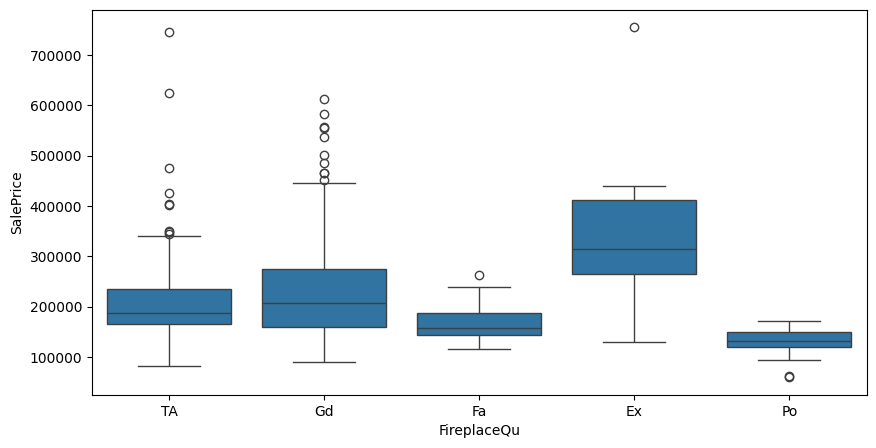

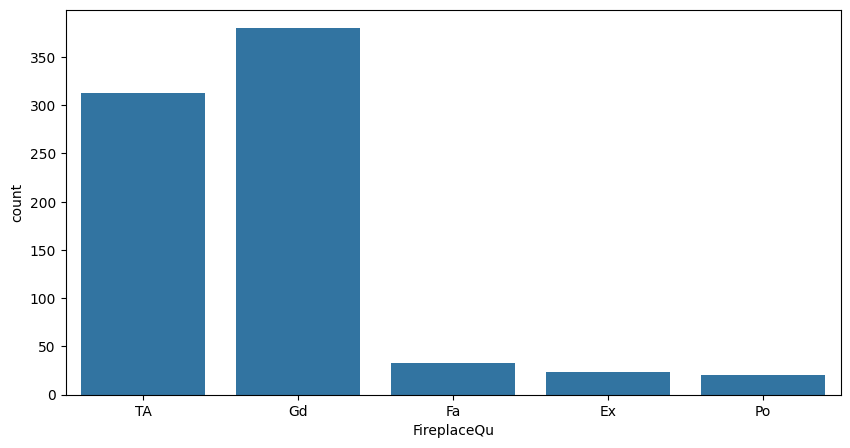

In [202]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = train['FireplaceQu'], y = train['SalePrice'])
plt.show()

plt.figure(figsize = (10, 5))
sns.countplot(x = train['FireplaceQu'])
plt.show()


This feature won't help us, since we already have a feature for the number of fireplaces, so we can drop it.

For `MasVnrType`, we can replace the nulls with 'None'

In [203]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [204]:
train = train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)
test = test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

### Correlations to SalePrice

Rather than handpicking variables, we can look at the correlations between SalePrice and the rest of the features. This will help us decide if we need to drop any features.

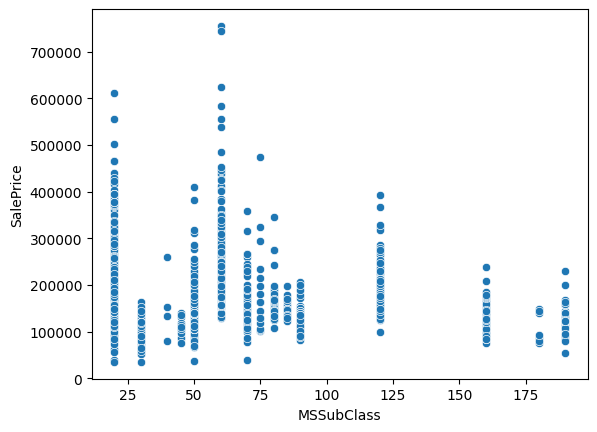

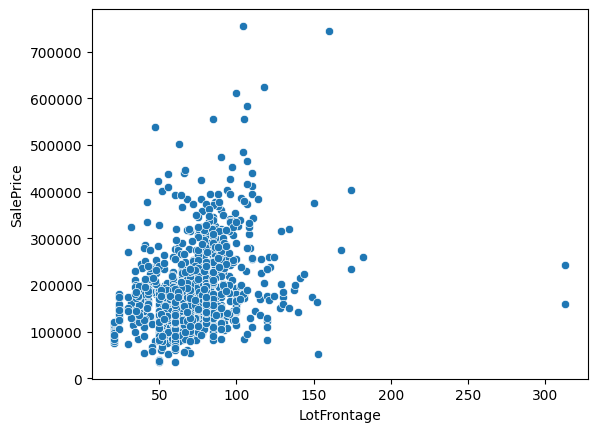

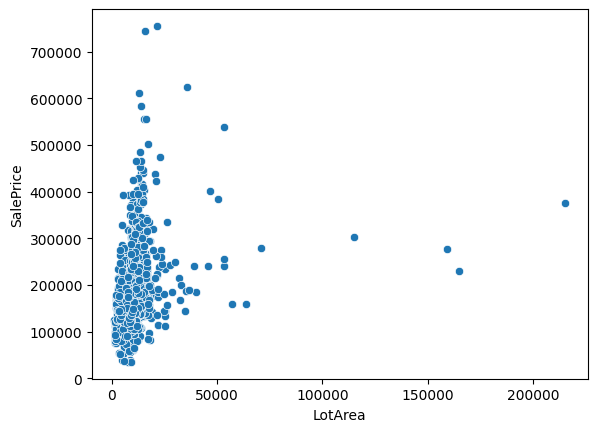

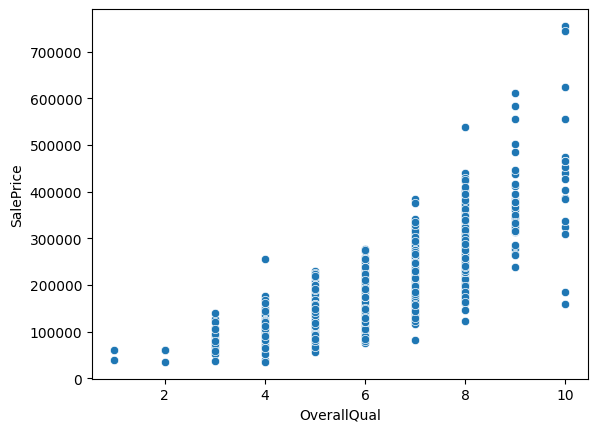

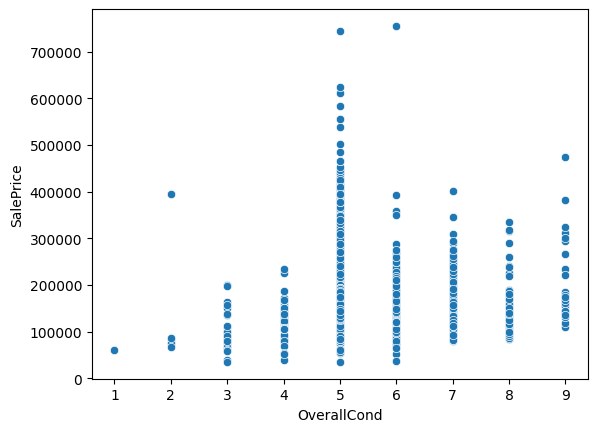

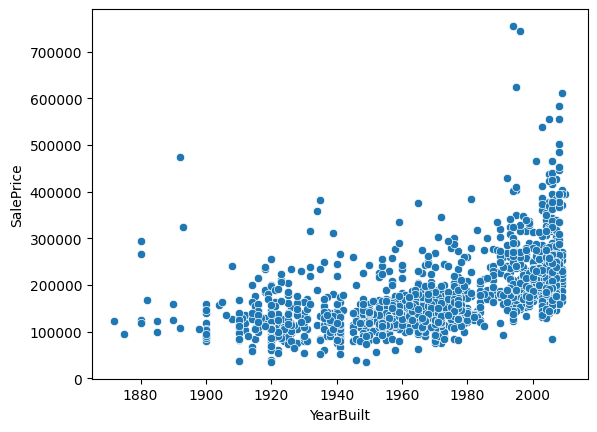

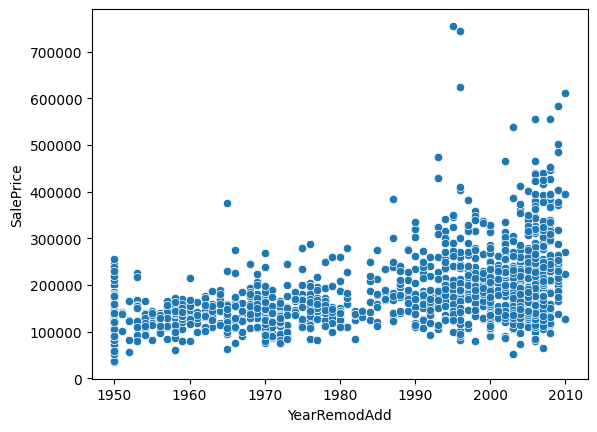

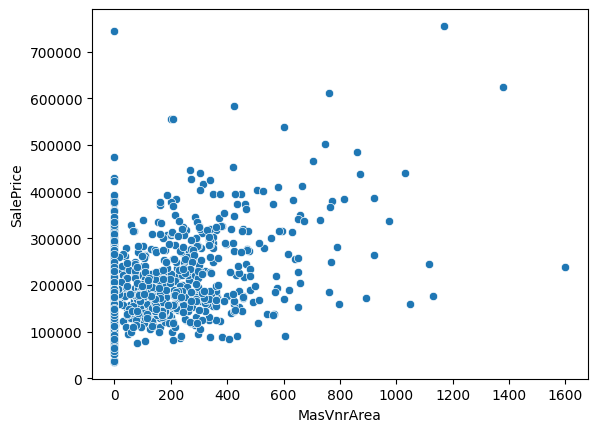

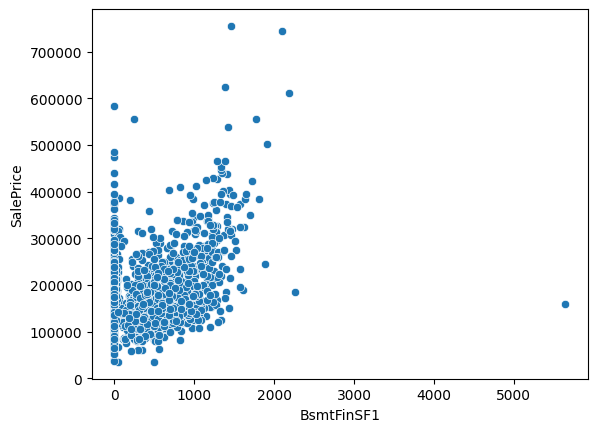

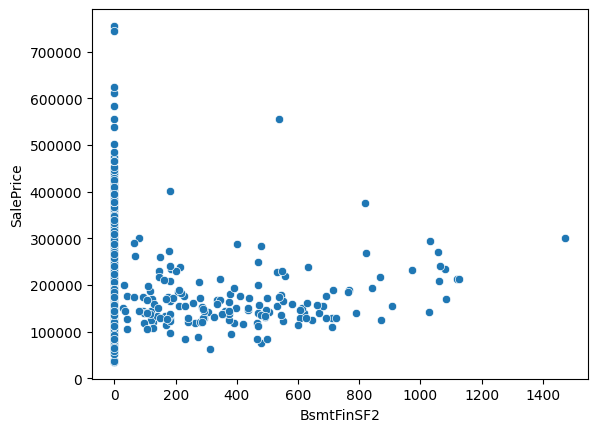

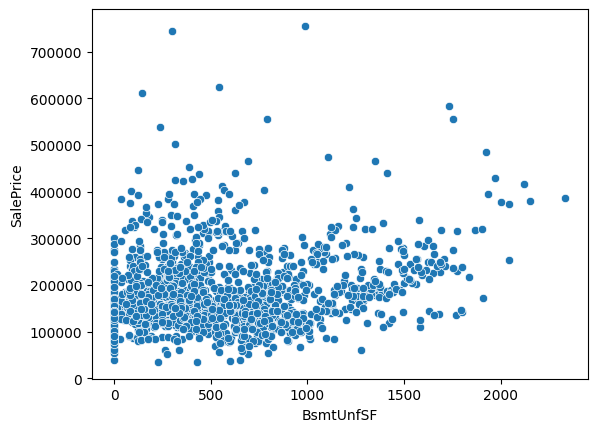

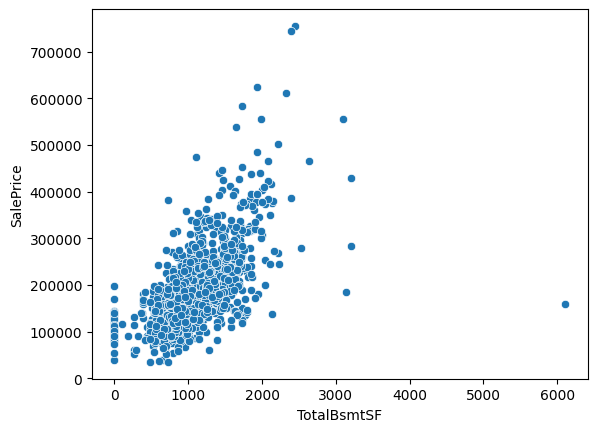

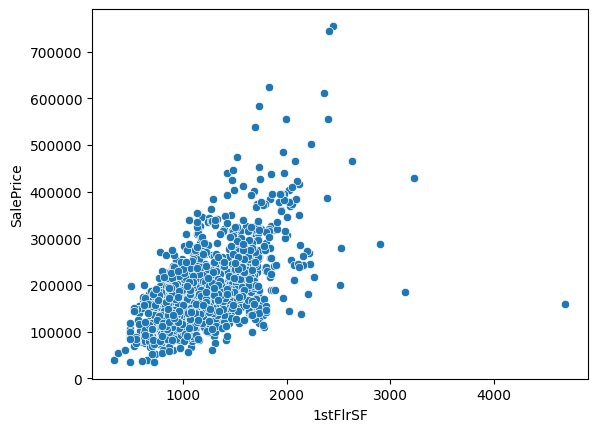

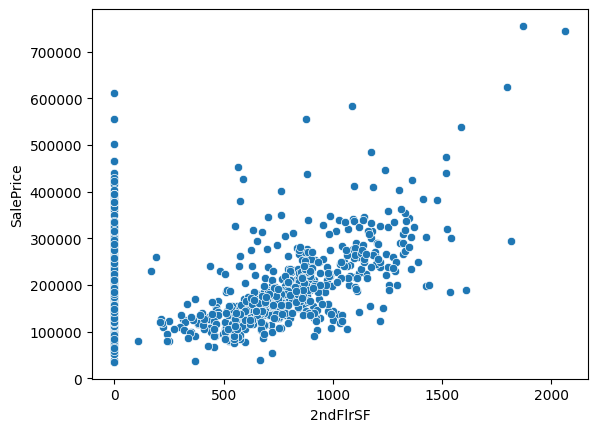

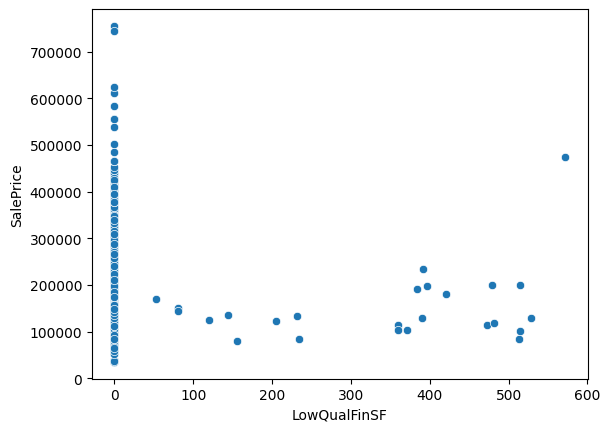

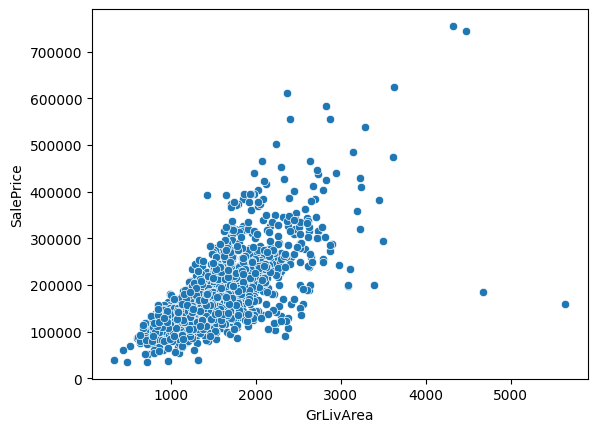

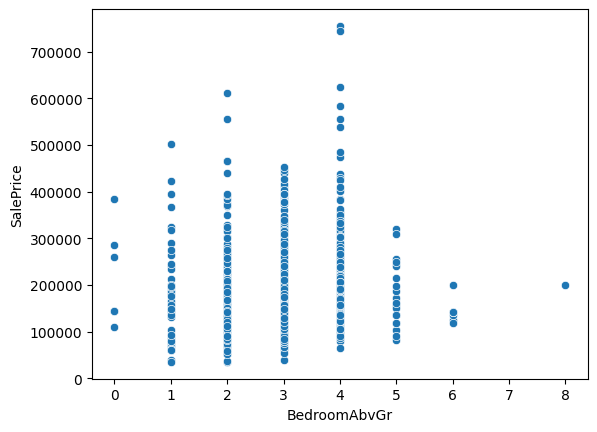

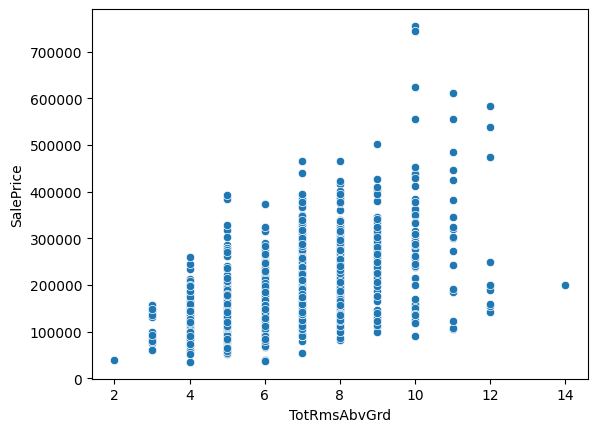

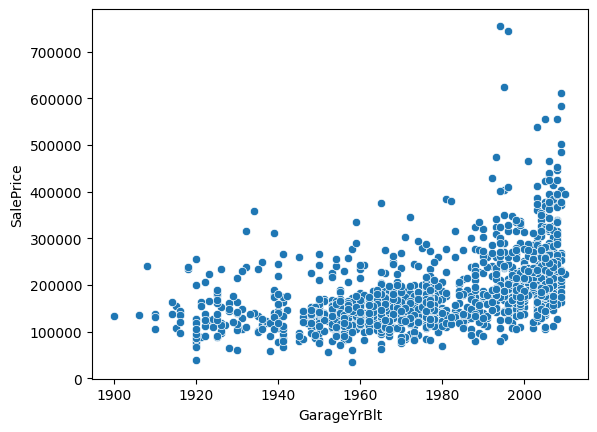

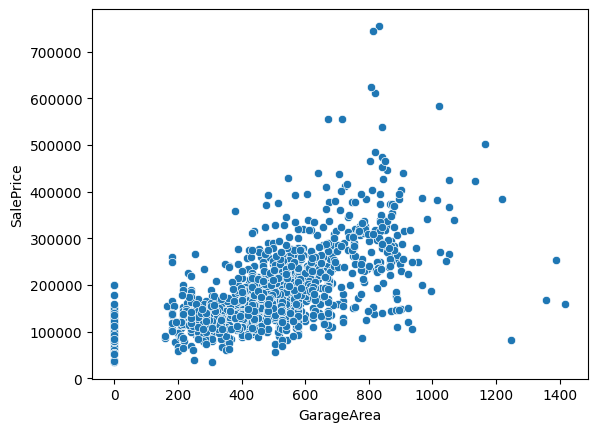

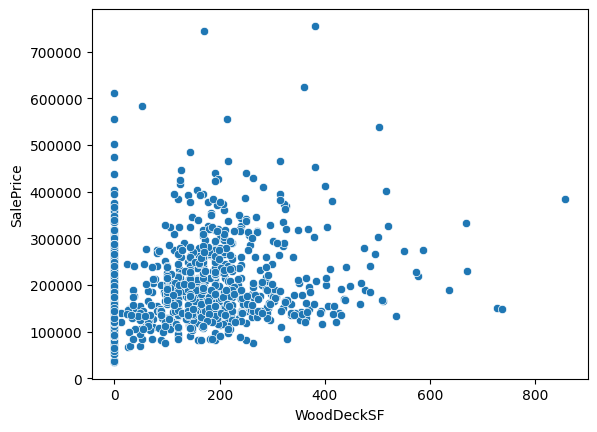

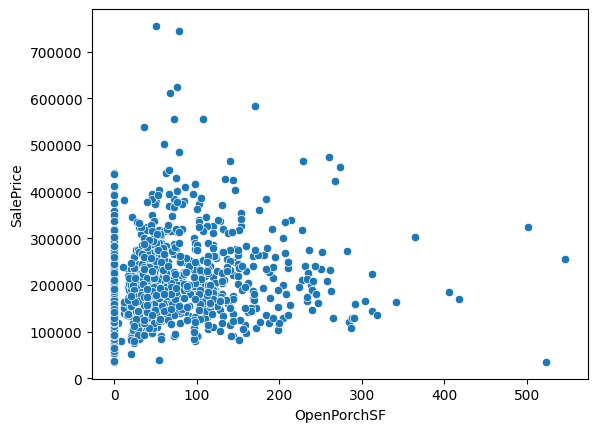

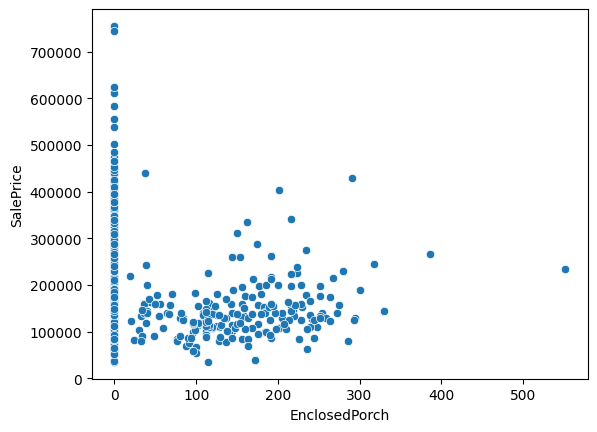

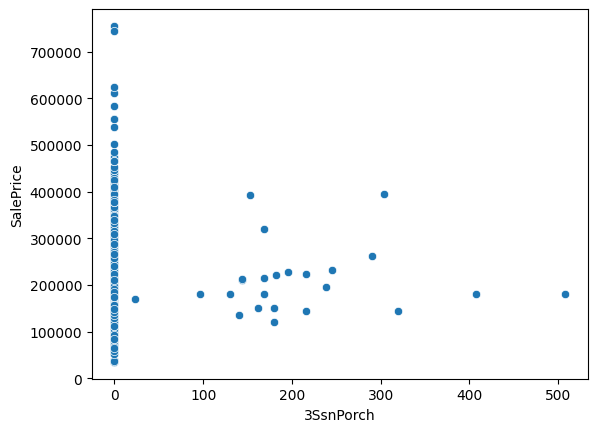

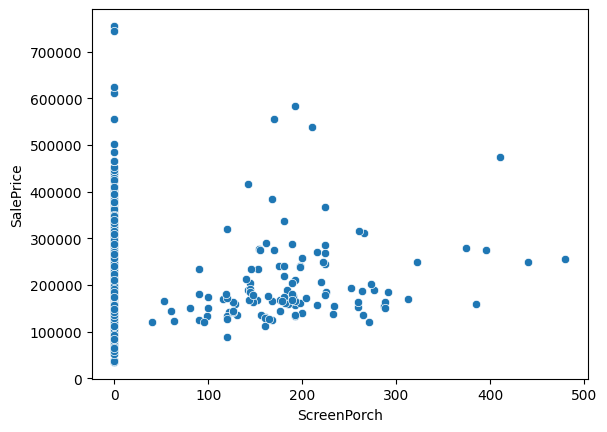

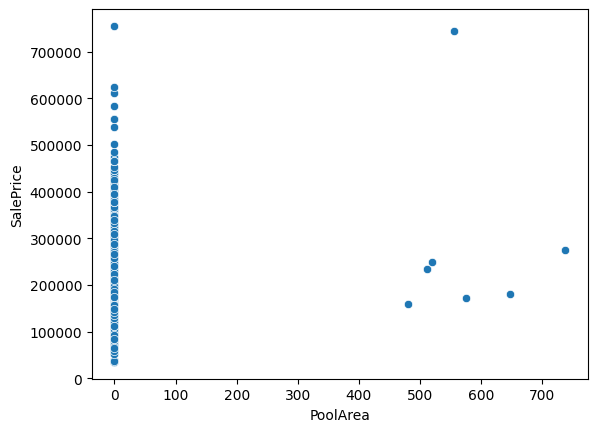

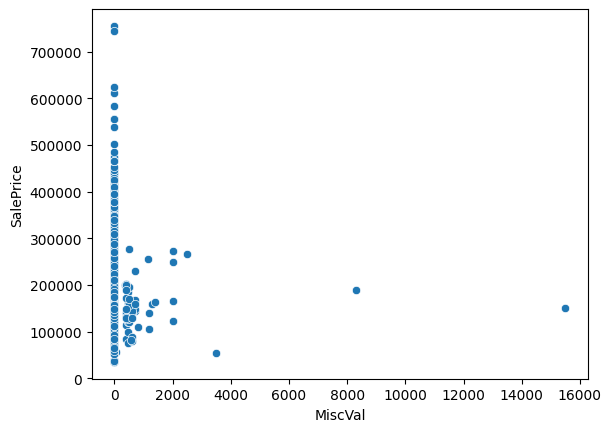

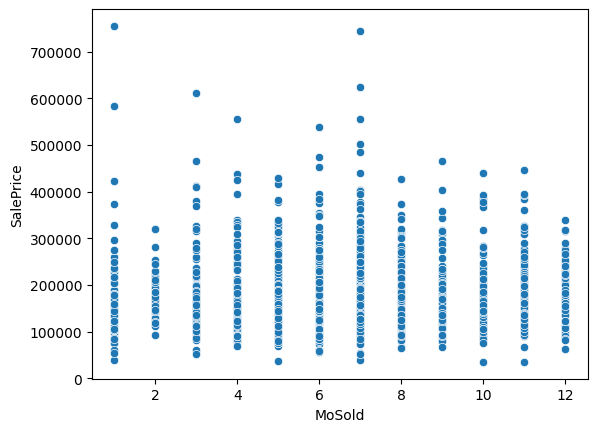

In [205]:
numerical_categories = train.select_dtypes(include = ['int64', 'float64'])
numerical_categories = numerical_categories.drop('SalePrice', axis=1)
numerical_categories = numerical_categories.columns[numerical_categories.nunique() > 5]

for i, col in enumerate(numerical_categories):
    plt.figure(i)
    sns.scatterplot(x = train[col], y = train['SalePrice'])
    plt.show()

Features that appear to have minimal correlation with SalePrice are: `ScreenPorch`, `EnclosedPorch`, `OpenPorchSf`, `BsmtFinSF2`, `BsmtUnfSF`, `LowQualFinSF`, `PoolArea`, `3SsnPorch`, and `MiscVal`. 

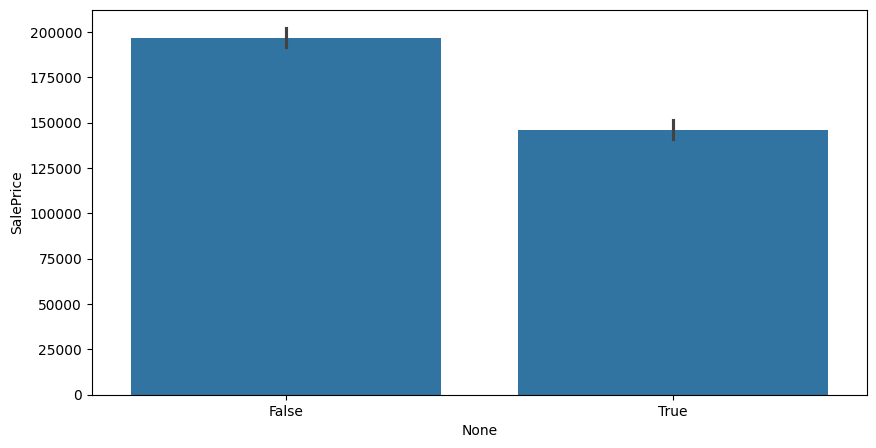

In [206]:
#houses without a porch
no_porch = train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]==0
no_porch = no_porch.all(axis = 1)
#plotting price of houses with a porch to those without
plt.figure(figsize = (10, 5))
sns.barplot(x = no_porch, y = train['SalePrice'])
plt.show()

Since the area of the porch's didn't significantly affect the price of the house, we can drop them and replace them with a feature that indicates if the house has a porch.

In [207]:
no_porch = train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]==0
no_porch = no_porch.all(axis = 1)
train['HasPorch'] = ~no_porch
test['HasPorch'] = ~no_porch
train['HasPorch'] = train['HasPorch'].astype(int)
test['HasPorch'] = test['HasPorch'].astype(int)

In [208]:
train = train.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                    'BsmtFinSF2', 'BsmtUnfSF', 'MiscVal', 'PoolArea'], axis=1)
test = test.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                   'BsmtFinSF2', 'BsmtUnfSF', 'MiscVal', 'PoolArea'], axis=1)

### High Correlations and Useless Features

In [209]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice,HasPorch
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,6.321918,2007.815753,180921.195890,0.686301
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,2.703626,1.328095,79442.502883,0.464154
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,8.000000,2009.000000,214000.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,12.000000,2010.000000,755000.000000,1.000000


Lets use the correlation matrix to see if there are any highly correlated features.

In [220]:
temp = train.copy()
categorical_cols = temp.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    temp[col] = le.fit_transform(temp[col])

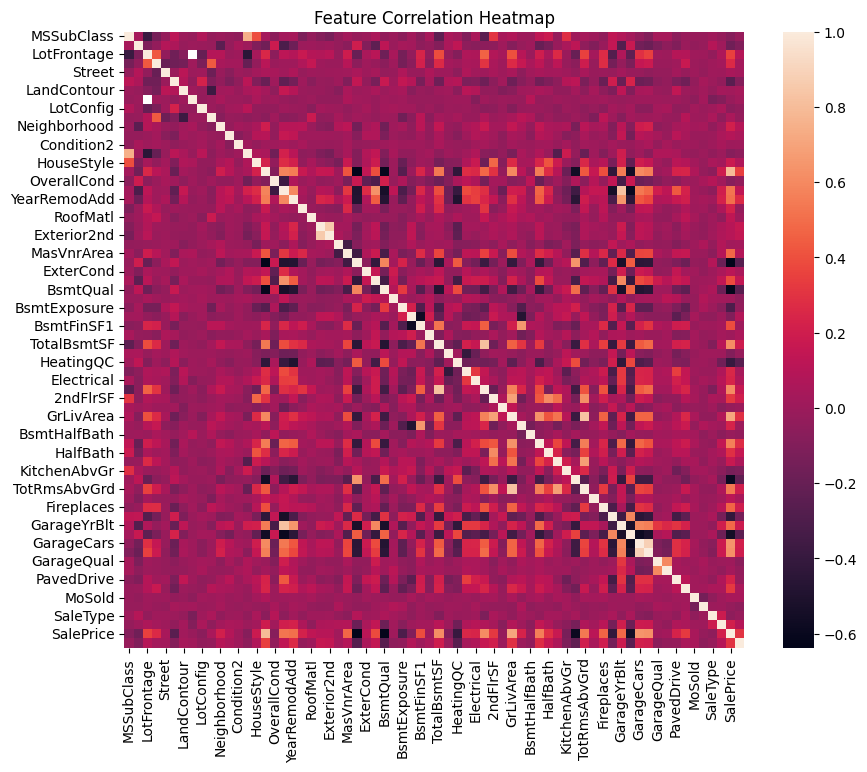

In [224]:
corr_matrix = temp.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title("Feature Correlation Heatmap")
plt.show()

## Nulls

For dealing with these values, we will combine the train and test sets into one dataframe.

In [141]:
combined = pd.concat([train, test], axis=0)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemodAdd 

The features with null are:
`'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','TotalBsmtSF', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'GarageQual', 'KitchenQual', 'Functional','GarageFinish', 'GarageCond', 'GarageYrBlt', 'GarageType' 'GarageCars', 'GarageArea', 'SaleType'`

The numerical nulls:
`'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'`

The categorical nulls:
`'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageQual', 'KitchenQual', 'Functional','GarageFinish', 'GarageCond', 'GarageType', 'SaleType'`

First we will deal with the numerical nulls

### Numerical Nulls

Before this, let's see how many houses have garages and basements, since we can use this information to deal with the nulls

In [142]:
has_garage = combined['GarageType'].notnull().astype(int)

has_bsmt = combined['BsmtQual'].notnull().astype(int)

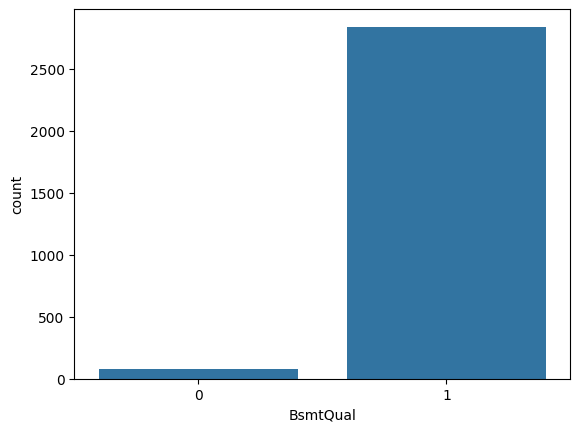

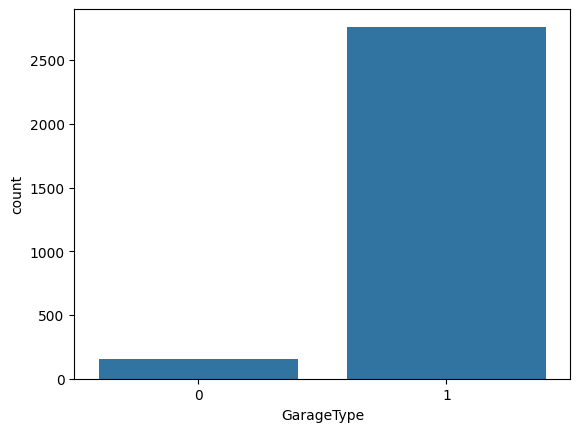

In [ ]:
sns.countplot(x = has_bsmt)
plt.show()

sns.countplot(x = has_garage)
plt.show()

We can see that most houses have a garage and basement

In [144]:
combined[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF','BsmtFullBath',
           'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2433.000000,2896.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000
mean,69.305795,102.201312,441.423235,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572
std,23.344905,179.334253,455.610826,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,68.000000,0.000000,368.500000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,733.000000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [145]:
masvnrarea_mean = combined.loc[combined['MasVnrType']!='None', 'MasVnrArea'].mean()

combined.fillna({'MasVnrArea': masvnrarea_mean}, inplace = True)

In [146]:
#Garage and Basement features with null are likely to be houses without garages or basements
#filling with 0
combined.fillna({'GarageYrBlt': 0, 'GarageCars': 0, 'GarageArea': 0, 'BsmtFinSF1': 0, 'TotalBsmtSF': 0,
                 'BsmtFullBath': 0, 'BsmtHalfBath': 0}, inplace = True)

In [147]:
#Lot Frontage has a large disparity between 75th percentile and max
#meaning there are many outliers skewing, so we will fill with the median
combined.fillna({'LotFrontage': combined['LotFrontage'].median()}, inplace = True)

### Categorical Nulls

In [148]:
combined[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 
          'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 
          'Electrical','GarageQual', 'KitchenQual', 'Functional','GarageFinish', 
          'GarageCond', 'GarageType', 'SaleType']].describe()

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageQual,KitchenQual,Functional,GarageFinish,GarageCond,GarageType,SaleType
count,2915,2917,2918,2918,2838,2837,2837,2840,2839,2918,2760,2918,2917,2760,2760,2762,2918
unique,5,2,15,16,4,4,4,6,6,5,5,4,7,3,5,6,9
top,RL,AllPub,VinylSd,VinylSd,TA,TA,No,Unf,Unf,SBrkr,TA,TA,Typ,Unf,TA,Attchd,WD
freq,2265,2916,1025,1014,1283,2606,1904,851,2493,2671,2604,1492,2717,1230,2654,1723,2525


We will fill MSZoning, Utilities, Exterior1st, Exterior2nd, Electrical, KitchenQual, Functional, and SaleType with the mode

In [149]:
combined.fillna({'MSZoning': 'RL', 'Utilities': 'AllPub', 'Exterior1st': 'VinylSd',
                 'Exterior2nd': 'VinylSd', 'Electrical': 'SBrkr', 'KitchenQual': 'TA',
                 'Functional': 'Typ', 'SaleType': 'WD'}, inplace = True)

All basement and garage features with null values are likely houses without garages or basements

In [150]:
combined.fillna({'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtExposure': 'NA',
                 'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA', 'GarageQual': 'NA',
                 'GarageFinish': 'NA', 'GarageCond': 'NA', 'GarageType': 'NA'}, 
                 inplace = True)

## Encoding

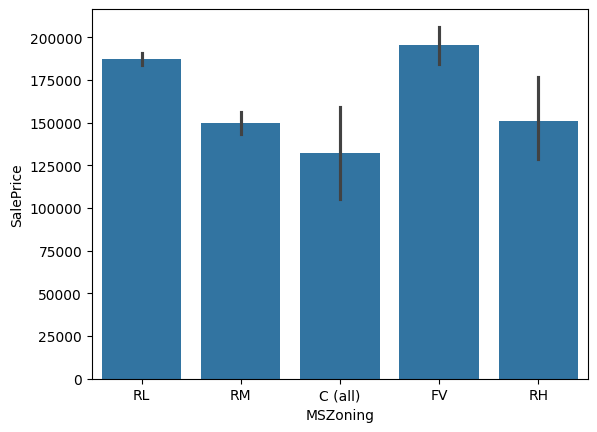

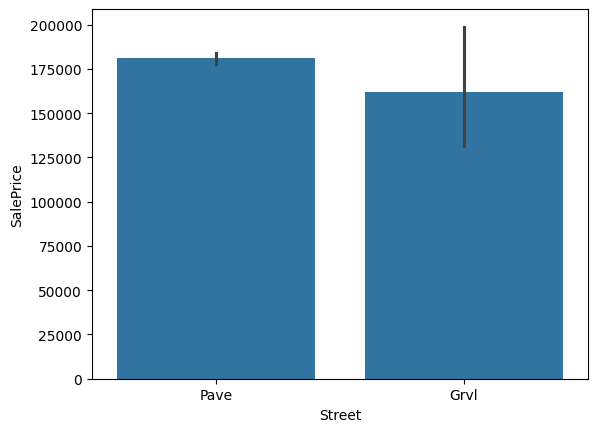

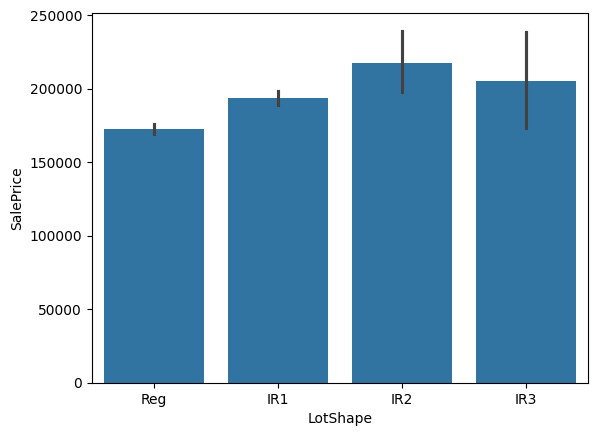

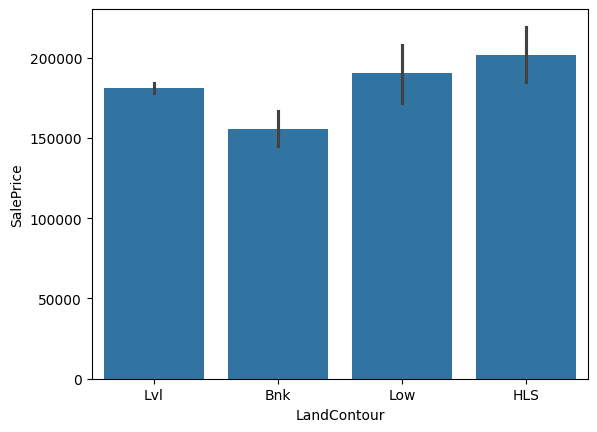

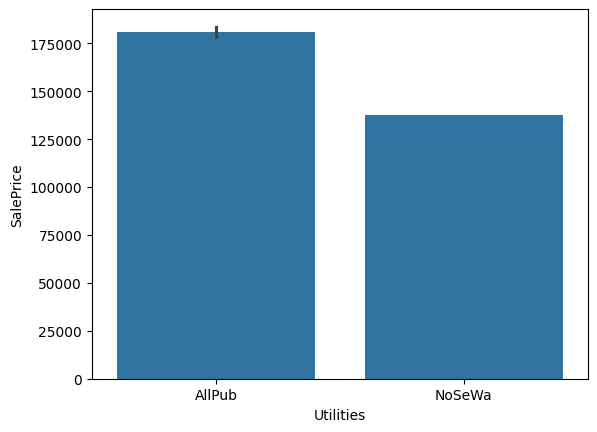

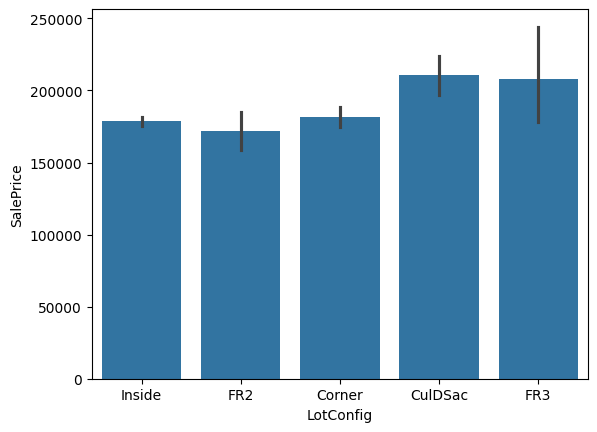

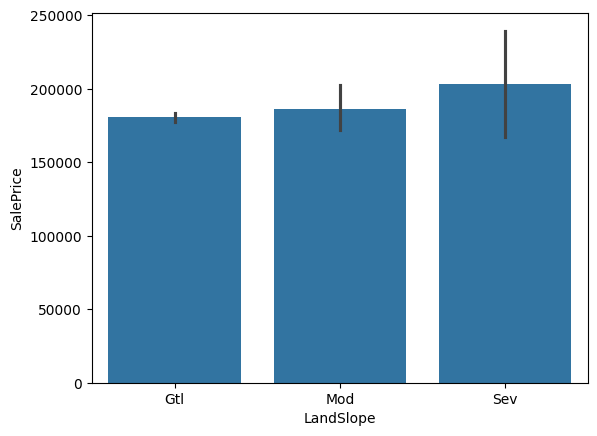

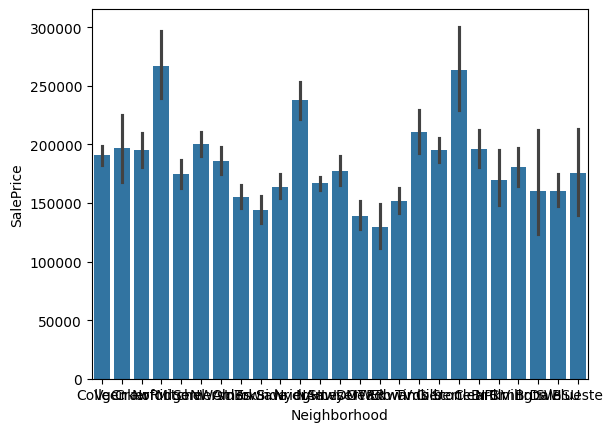

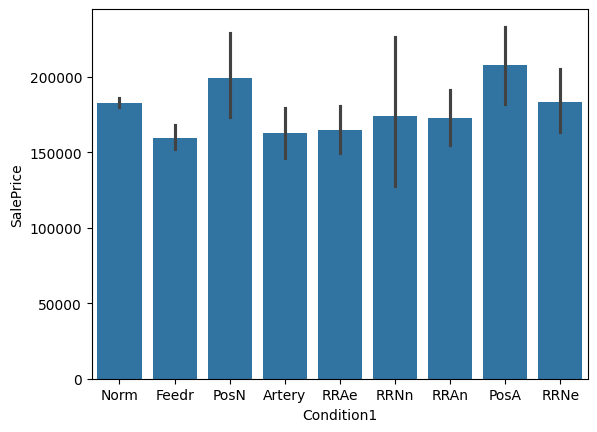

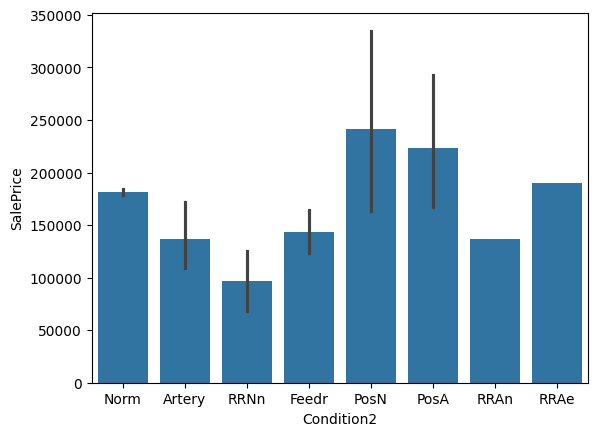

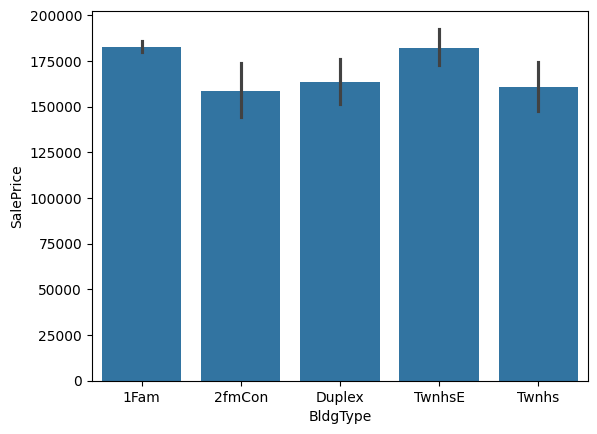

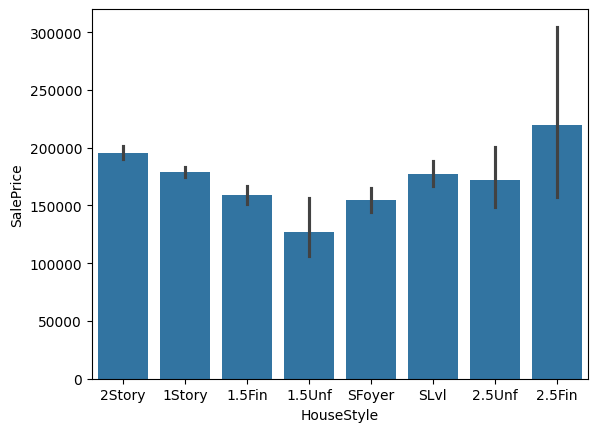

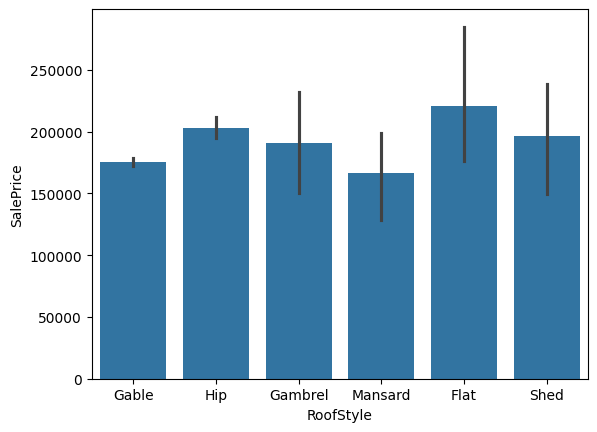

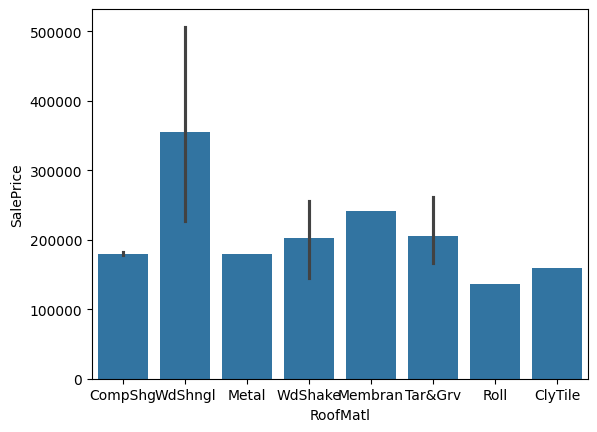

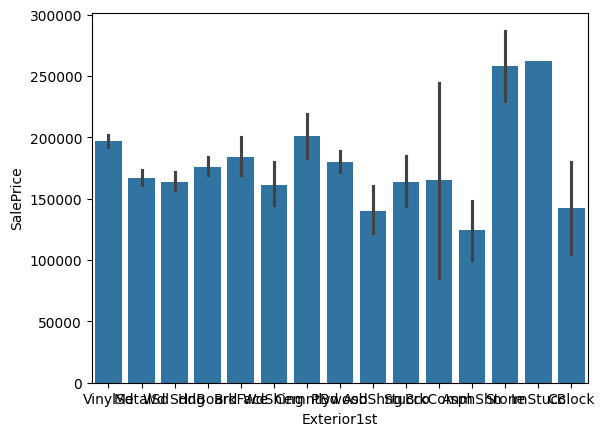

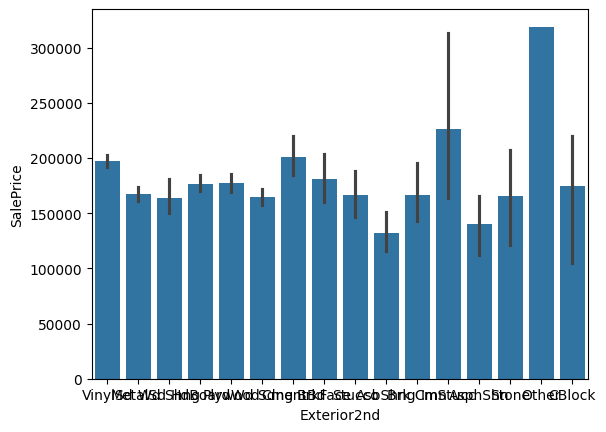

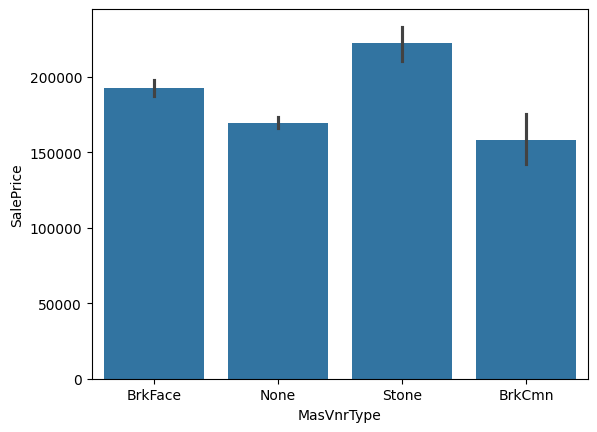

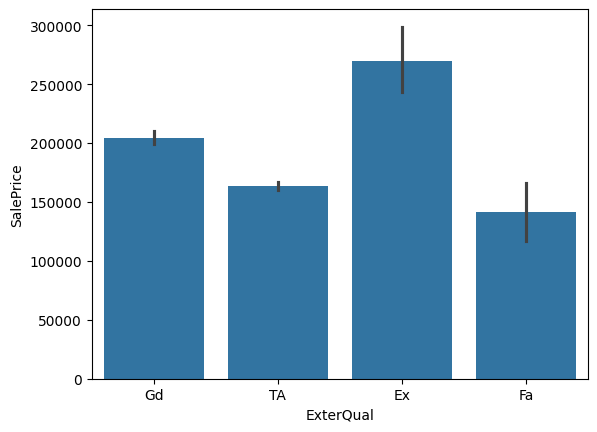

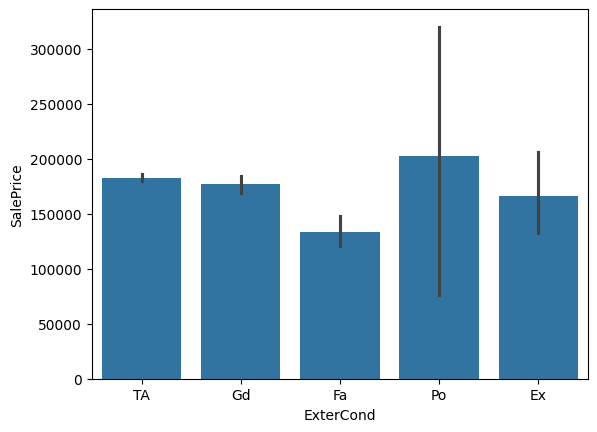

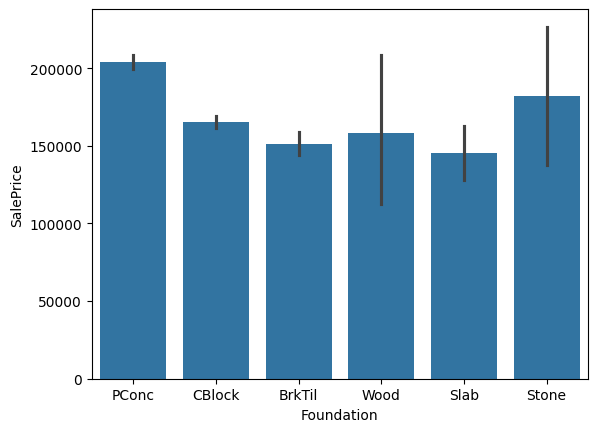

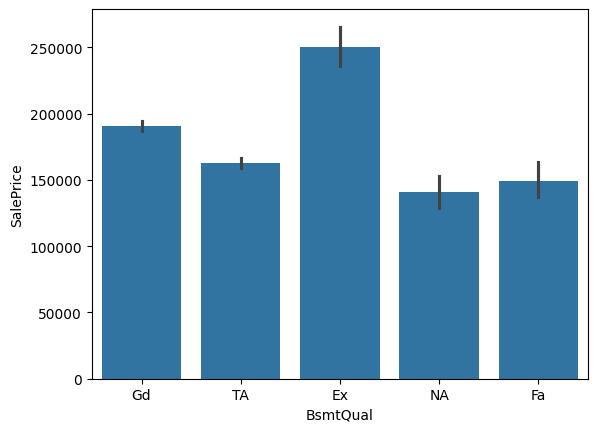

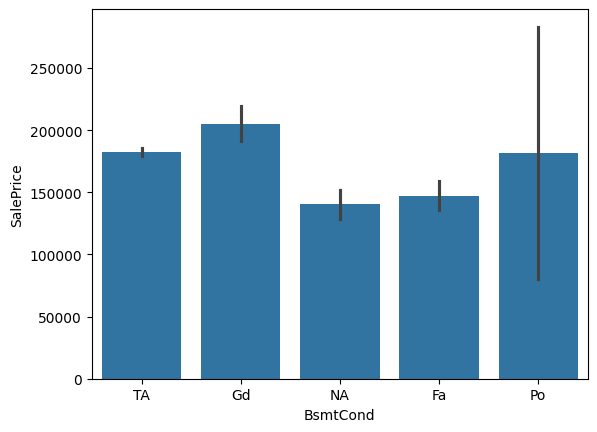

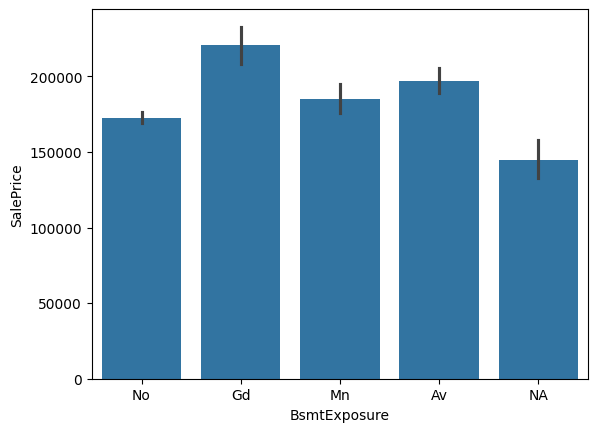

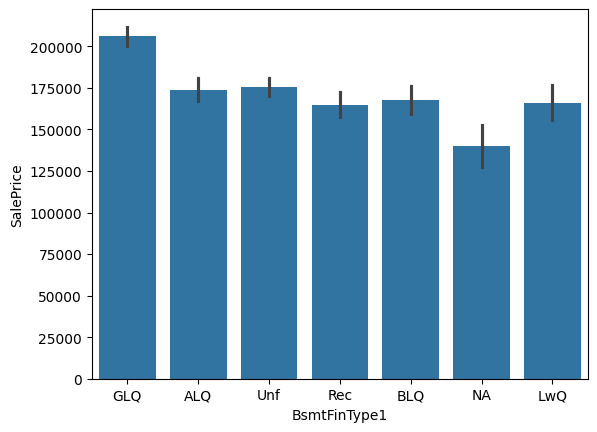

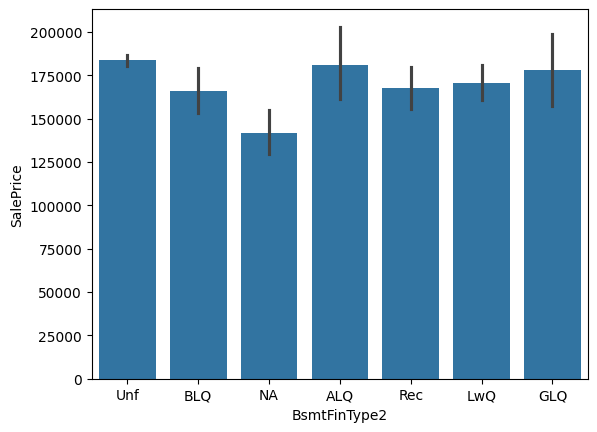

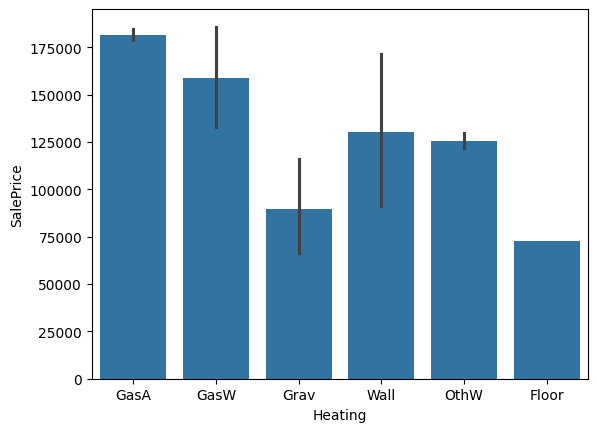

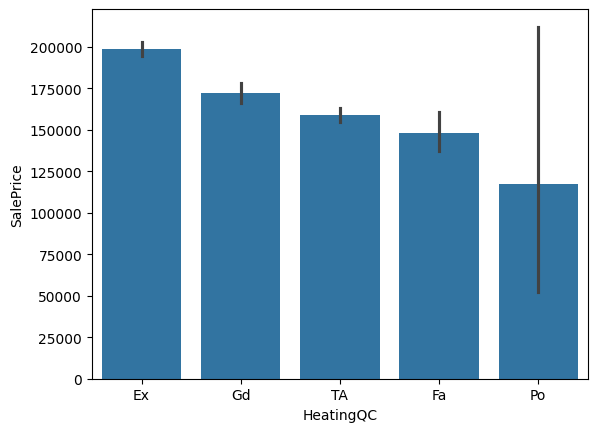

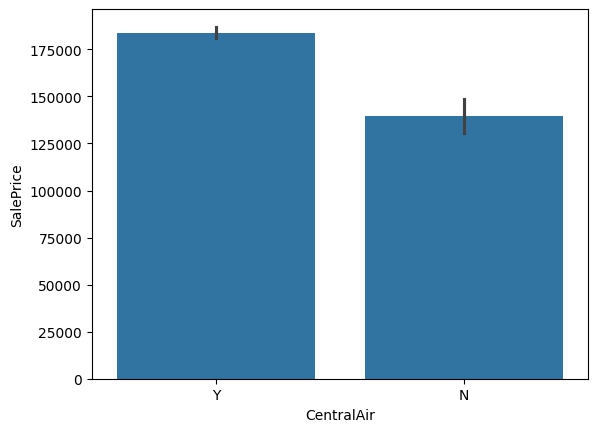

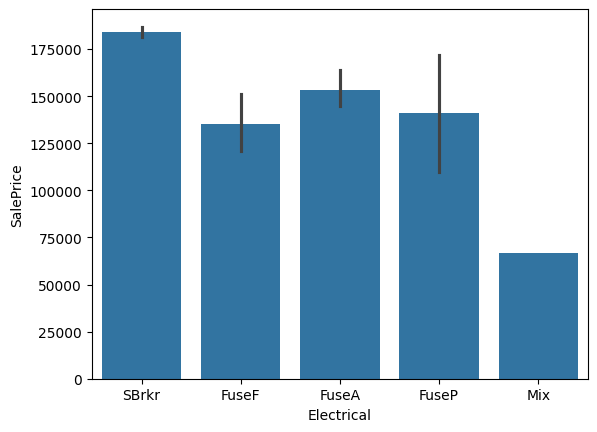

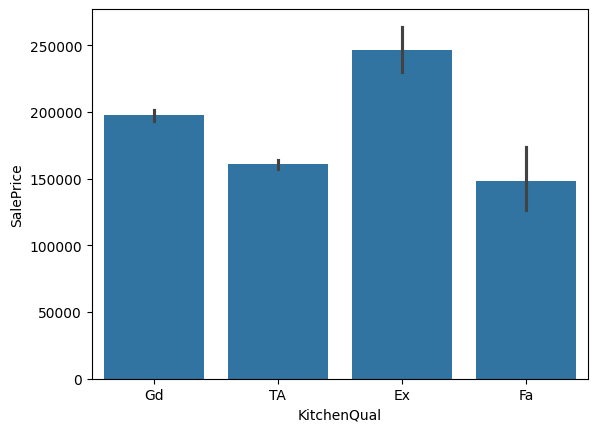

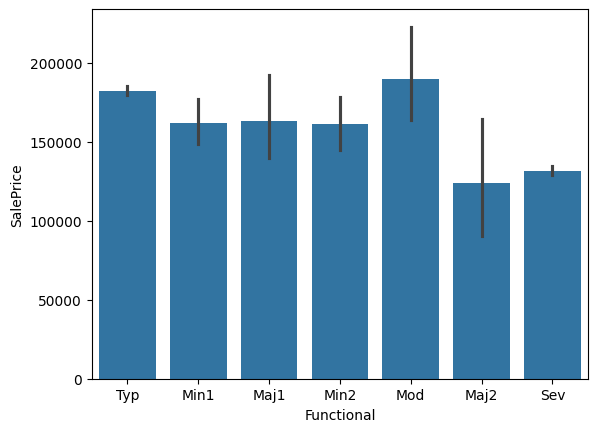

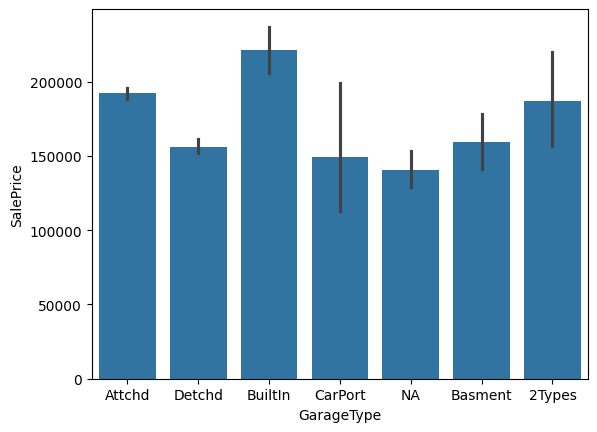

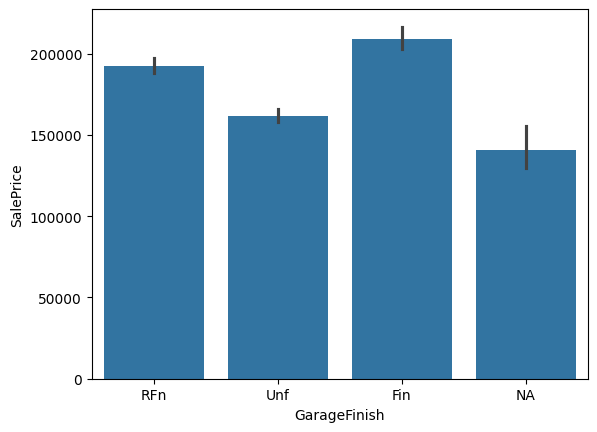

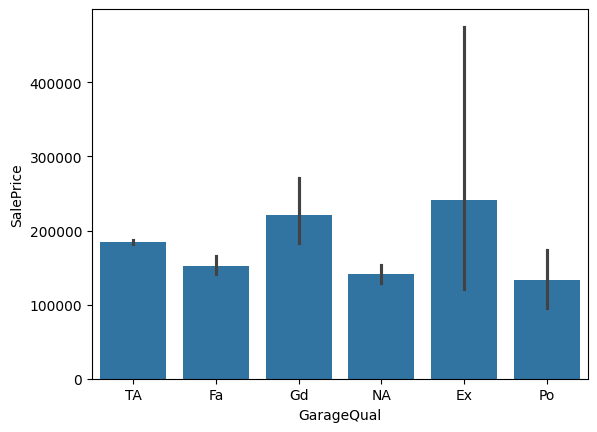

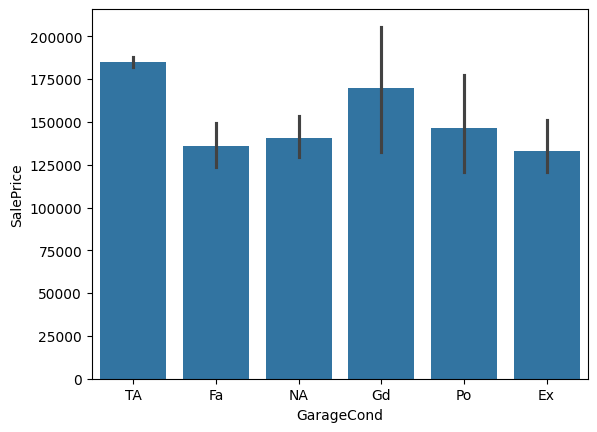

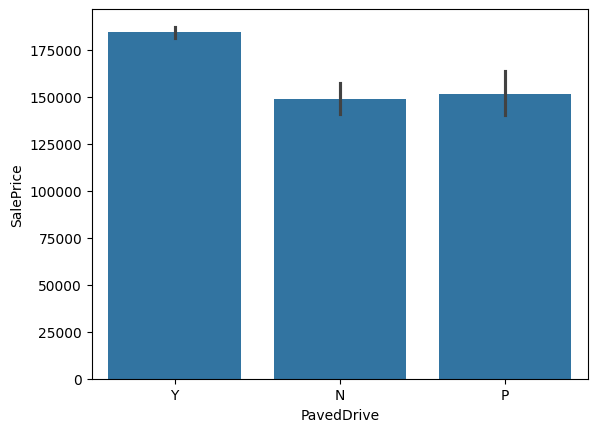

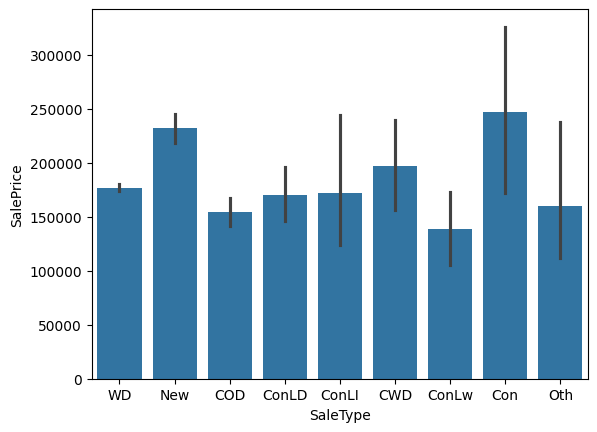

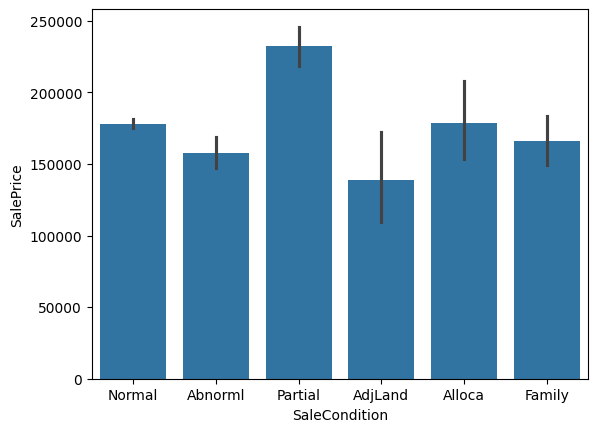

In [151]:
#Graphing categorical features to see if they have a significant impact on SalePrice
categorical = combined.select_dtypes(include = ['object'])
for i, col in enumerate(categorical):
    plt.figure(i)
    sns.barplot(x = combined[col], y = combined['SalePrice'])
    plt.show()

In [152]:
#Label Encoding
le = LabelEncoder()
categorical = combined.select_dtypes(include = ['object'])
for col in categorical:
    if col == "LandSlope" or col == "HeatingQC":
        combined[col] = le.fit_transform(combined[col])

combined.describe()

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice,HasPorch
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,57.137718,69.088386,10168.114080,0.053786,6.089072,5.564577,1971.312778,1984.264474,103.408898,441.272011,1051.417266,1.533744,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1870.364166,1.766016,472.712573,93.709832,6.213087,2007.792737,180921.195890,0.686194
std,42.517628,21.317898,7886.996359,0.248750,1.409947,1.113131,30.291442,20.894344,179.139490,455.606014,441.120498,1.742548,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,449.686321,0.762196,215.535686,126.526589,2.714762,1.314964,79442.502883,0.464118
min,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,20.000000,60.000000,7478.000000,0.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,793.000000,0.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,50.000000,68.000000,9453.000000,0.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,989.000000,0.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,70.000000,78.000000,11570.000000,0.000000,7.000000,6.000000,2001.000000,2004.000000,169.500000,733.000000,1302.000000,4.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,8.000000,2009.000000,214000.000000,1.000000
max,190.000000,313.000000,215245.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,12.000000,2010.000000,755000.000000,1.000000


Another interesting feature I viewed in those graphs are the neighbourhoods. Let's take a closer look.

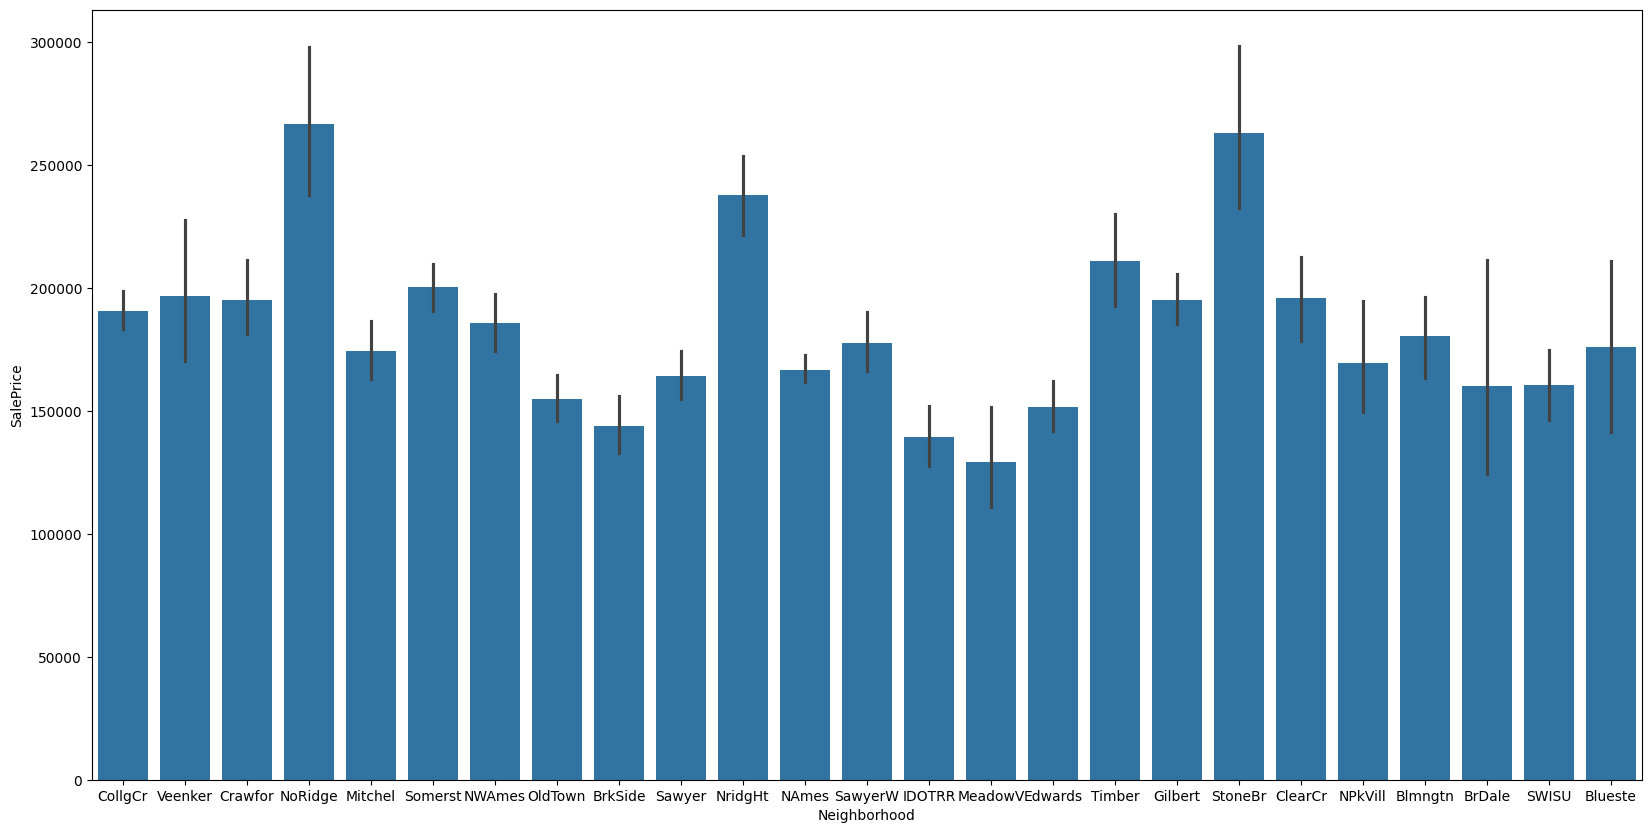

In [153]:
plt.figure(figsize = (20, 10))
sns.barplot(x = combined['Neighborhood'], y = combined['SalePrice'])
plt.show()

In [154]:
combined[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values(by = 'SalePrice')

,SalePrice
Neighborhood,
MeadowV,98576.470588
IDOTRR,100123.783784
BrDale,104493.750000
BrkSide,124834.051724
Edwards,128219.700000
OldTown,128225.300885
Sawyer,136793.135135
Blueste,137500.000000
SWISU,142591.360000


We can see three clear above the rest, a middle area, then a few on the outskirts. Let's change this feature into 3 categories using IQR. The first category is anything below the 25th percentile, the second is anything between the 25th and 75th percentile, and the third is anything above the 75th percentile.

In [155]:
dic = {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 1, 'NoRidge': 2, 'Mitchel': 1, 
       'Somerst': 2, 'NWAmes': 1, 'OldTown': 0, 'BrkSide': 0, 'Sawyer': 1, 
       'NridgHt': 2, 'NAmes': 1, 'SawyerW': 1, 'IDOTRR': 0, 'MeadowV': 0, 
       'Edwards': 0, 'Timber': 2, 'Gilbert': 1, 'StoneBr': 2, 'ClearCr': 1, 
       'BrDale': 0, 'Blmngtn': 1, 'SWISU': 1, 'Blueste': 1, 'NPkVill': 1}
combined['Neighborhood'] = combined['Neighborhood'].map(dic)


Now let's take a look at SalePrice

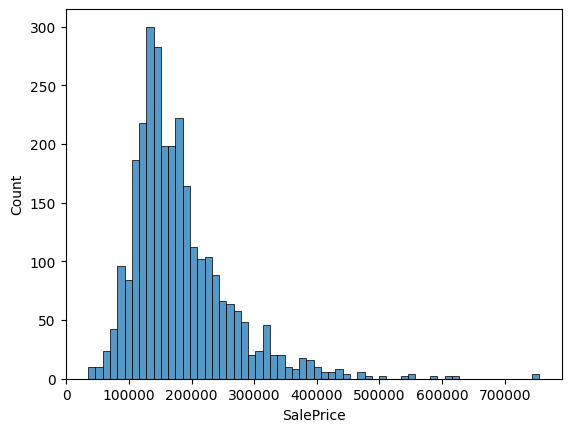

In [156]:
sns.histplot(x = combined['SalePrice'])
plt.show()

Since our data is skewed to the right, let's take the log of SalePrice

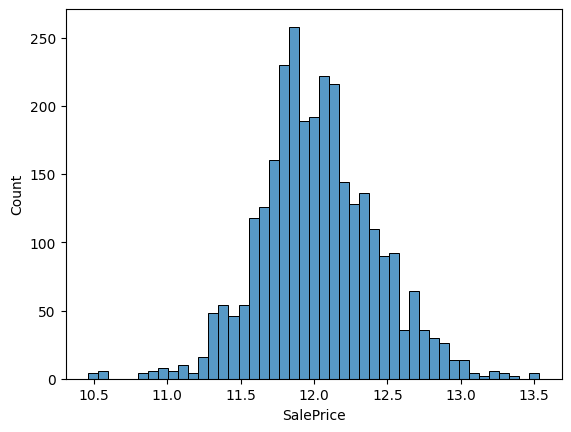

In [ ]:
combined['SalePrice'] = np.log1p(combined['SalePrice'])
sns.histplot(x = combined['SalePrice'])
plt.show()

Now let's create a feature for total square footage, since this is something people will look for when buying a house

In [158]:
combined['TotalSQFT'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPorch,TotalSQFT
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,0,1,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,856.0,GasA,0,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,2,2008,WD,Normal,12.247699,1,2566.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,0,2,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,1262.0,GasA,0,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,5,2007,WD,Normal,12.109016,0,2524.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,0,1,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,920.0,GasA,0,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,9,2008,WD,Normal,12.317171,1,2706.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,0,1,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,756.0,GasA,2,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,2,2006,WD,Abnorml,11.849405,1,2473.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,0,2,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,1145.0,GasA,0,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,12,2008,WD,Normal,12.429220,1,3343.0


Finally, let's one-hot encode the categorical features

In [159]:
combined = pd.get_dummies(combined)
combined.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice,HasPorch,TotalSQFT,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,1,7,5,2003,2003,196.0,706.0,856.0,0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,2,2008,12.247699,1,2566.0,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,Fals

## Prepare Data for Modeling

In [160]:
train = combined[:len(train)]
test = combined[len(train):]

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 243), (1459, 243), (1168,), (1459,))

## Train

We will be testing on 4 models, Random Forests, XGBoost, LightGBM, and Linear Regression.

### Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [162]:
y_pred_lr = lr_model.predict(X_val)
rmse_lr = np.sqrt(root_mean_squared_error((y_val), (y_pred_lr)))
print('Linear Regression RMSE:', rmse_lr)

Linear Regression RMSE: 0.3668900012224175


### LightGBM

In [ ]:
lgbm_model = LGBMRegressor(random_state = 13, n_estimators=2000, learning_rate=0.05, early_stopping_rounds=5)
lgbm_model.fit(X_train, y_train, eval_set = [(X_val, y_val)])

[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.030658
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0195788


LGBMRegressor(early_stopping_rounds=5, learning_rate=0.05, n_estimators=2000,
              random_state=13)

In [164]:
y_pred_lgbm = lgbm_model.predict(X_train)
rmse_lgbm = np.sqrt(root_mean_squared_error((y_train), (y_pred_lgbm)))
print('LGBM RMSE:', rmse_lgbm)

LGBM RMSE: 0.2283356030773929


### XGBoost 

In [ ]:
xgboost_model = XGBRegressor(random_state=13, max_depth=3, n_estimators=2000, learning_rate=0.05, early_stopping_rounds=10)
xgboost_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=13, ...)

In [166]:
y_pred_xgboost = xgboost_model.predict(X_train)
rmse_xgboost = np.sqrt(root_mean_squared_error((y_train), (y_pred_xgboost)))
print('XGBoost RMSE:', rmse_xgboost)

XGBoost RMSE: 0.2877635479191632


### Random Forests

In [167]:
rf_model = RandomForestRegressor(random_state=13)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=13)

In [ ]:
y_pred_rf = rf_model.predict(X_val)
rmse_rf = np.sqrt(root_mean_squared_error((y_val), (y_pred_rf)))
print('Random Forest RMSE:', rmse_rf)

Random Forest RMSE: 0.37682685088283063


## Evaluate

Let's use the LightGBM model since it performed the best.

In [169]:
y_pred = lgbm_model.predict(X_test)
predictions = np.expm1(y_pred)
pred_df = pd.DataFrame(predictions, columns = ['SalePrice'])
pred_df.index.name = 'Id'
pred_df.index += 1461
pred_df.head()

,SalePrice
Id,
1461,124175.323182
1462,162858.163029
1463,184090.732133
1464,194824.991301
1465,187455.618297


In [ ]:
pred_df.to_csv('submission.csv', header=True)